This data is available from the oklahoma dept of education website report cards section  for 2023-2024. This Notebook with take a deep analysis of the science test first. Other notebooks by subject will be uploaded shortly after this one. Analysis will be done using python libraries by author, David Swift MEd.

The following code will import the coding librares I might use.

In [93]:
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.io as pio


In [94]:

pio.renderers.default = 'notebook_connected'
download_url = f'https://drive.google.com/uc?id={'1yw6U8CF3GDdUDs-S8bwVPyUhxUmuovd8'}'

df_Ok = pd.read_csv(download_url)


C:\Users\swift\AppData\Local\Temp\ipykernel_4532\153366695.py:4: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



Head calls the top so many rows so I can make sure the data loads and take a quick glance of the structure of data.

In [95]:
df_Ok.head(5)

,SchoolYear,EducationAgencyType,CountyCode,DistrictCode,SiteCode,FullCode,CountyName,DistrictName,SchoolName,GradeLevelLow,...,ReportSubgroup,ReportSubgroupShortName,ReportSubgroupLongName,IndicatorValue,IndicatorValueInt,IndexValue,PercentAdvanced,PercentProficient,PercentMetTarget,PercentBelowTarget
0,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,All,All,All,40.1,40,40,7,33,33,27
1,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,EconomicDisadvantage_No,Not Econ Dis,Not Economically Disadvantaged,47.4,47,47,7,41,28,25
2,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,EconomicDisadvantage_Yes,Econ Dis,Economically Disadvantaged,36.1,36,36,7,29,36,28
3,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,ELL_No,Not EL,Not English Learner,39.7,40,40,7,33,33,28
4,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,FAY_No,Not FAY,Not FAY,22.7,23,23,0,23,36,41


I notice the schoolname is often a null cell and the district name is used as a primary indicator.Next I'll take column names a data types.

In [96]:
df_Ok.dtypes

SchoolYear                   int64
EducationAgencyType         object
CountyCode                 float64
DistrictCode                object
SiteCode                   float64
FullCode                    object
CountyName                  object
DistrictName                object
SchoolName                  object
GradeLevelLow               object
GradeLevelHigh             float64
IndicatorSubtype            object
ReportSubgroup              object
ReportSubgroupShortName     object
ReportSubgroupLongName      object
IndicatorValue             float64
IndicatorValueInt            int64
IndexValue                   int64
PercentAdvanced              int64
PercentProficient            int64
PercentMetTarget             int64
PercentBelowTarget           int64
dtype: object

For the purpose of this analysis I'm going to focus on overall performance for Atoka HS on the science report card. It should be noted the data provided is a mix of 11th grade sci test and the ACT reasoning portion. Raw data of those 2 tests is not readily available. An open records request will be sent to get that data at a later date for further analysis.

For this analysis I will be grouping percent advanced and proficient together since those are both considered a "pass" and named percentpass.I also compiled a new colum for met target and above for further analysis.

In [97]:
df_Ok["passpercent"] = df_Ok["PercentAdvanced"] + df_Ok["PercentProficient"]
df_Ok["attargetpercent"] = df_Ok["PercentAdvanced"] + df_Ok["PercentProficient"] + df_Ok["PercentMetTarget"]

Next I'll make sure the new column is at the far right and visually confirm its the correct sum.

In [98]:
df_Ok.head(5)

,SchoolYear,EducationAgencyType,CountyCode,DistrictCode,SiteCode,FullCode,CountyName,DistrictName,SchoolName,GradeLevelLow,...,ReportSubgroupLongName,IndicatorValue,IndicatorValueInt,IndexValue,PercentAdvanced,PercentProficient,PercentMetTarget,PercentBelowTarget,passpercent,attargetpercent
0,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,All,40.1,40,40,7,33,33,27,40,73
1,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,Not Economically Disadvantaged,47.4,47,47,7,41,28,25,48,76
2,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,Economically Disadvantaged,36.1,36,36,7,29,36,28,36,72
3,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,Not English Learner,39.7,40,40,7,33,33,28,40,73
4,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,Not FAY,22.7,23,23,0,23,36,41,23,59


Next I only want science data.

In [99]:
df_OkSci = df_Ok[df_Ok["IndicatorSubtype"] == "Science"]


In [100]:
df_OkSci.head(5)

,SchoolYear,EducationAgencyType,CountyCode,DistrictCode,SiteCode,FullCode,CountyName,DistrictName,SchoolName,GradeLevelLow,...,ReportSubgroupLongName,IndicatorValue,IndicatorValueInt,IndexValue,PercentAdvanced,PercentProficient,PercentMetTarget,PercentBelowTarget,passpercent,attargetpercent
76,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,All,41.8,42,42,7,35,35,24,42,77
77,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,Not Economically Disadvantaged,50.0,50,50,10,40,30,20,50,80
78,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,Economically Disadvantaged,37.1,37,37,6,31,37,26,37,74
79,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,Not English Learner,42.6,43,43,7,35,33,24,42,75
80,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,FAY,44.2,44,44,8,37,35,21,45,80


Next I'm only interested in the whole student body, I'll analyze the other data later for those stakeholders.

In [101]:
df_OkSci = df_OkSci[df_OkSci["ReportSubgroup"] == "All"]

In [102]:
df_OkSci.head(5)

,SchoolYear,EducationAgencyType,CountyCode,DistrictCode,SiteCode,FullCode,CountyName,DistrictName,SchoolName,GradeLevelLow,...,ReportSubgroupLongName,IndicatorValue,IndicatorValueInt,IndexValue,PercentAdvanced,PercentProficient,PercentMetTarget,PercentBelowTarget,passpercent,attargetpercent
76,2023,District,55.0,J002,NaN,55J002,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,NaN,NaN,...,All,41.8,42,42,7,35,35,24,42,77
173,2023,District,7.0,I003,NaN,07I003,BRYAN,ACHILLE,NaN,NaN,...,All,22.8,23,23,0,23,32,46,23,55
313,2023,District,62.0,I019,NaN,62I019,PONTOTOC,ADA,NaN,NaN,...,All,28.7,29,29,5,24,33,39,29,62
444,2023,District,46.0,I002,NaN,46I002,MAYES,ADAIR,NaN,NaN,...,All,49.3,49,49,8,42,33,18,50,83
557,2023,District,58.0,I026,NaN,58I026,OTTAWA,AFTON,NaN,NaN,...,All,31.9,32,32,2,30,30,38,32,62


Now I want to stop and check how many schools this leaves.

In [103]:
df_OkSci.shape

(2025, 24)

In [104]:
df_OkSci[df_OkSci["DistrictName"] == "ATOKA"]

,SchoolYear,EducationAgencyType,CountyCode,DistrictCode,SiteCode,FullCode,CountyName,DistrictName,SchoolName,GradeLevelLow,...,ReportSubgroupLongName,IndicatorValue,IndicatorValueInt,IndexValue,PercentAdvanced,PercentProficient,PercentMetTarget,PercentBelowTarget,passpercent,attargetpercent
2544,2023,District,3.0,I015,NaN,03I015,ATOKA,ATOKA,NaN,NaN,...,All,28.8,29,29,6,23,34,37,29,63
64768,2023,School,3.0,I015,120.0,03I015120,ATOKA,ATOKA,ATOKA ES,PK,...,All,27.4,27,27,3,25,42,31,28,70
64878,2023,School,3.0,I015,705.0,03I015705,ATOKA,ATOKA,ATOKA HS,09,...,All,31.6,32,32,11,21,21,47,32,53


Filtered away district data to leave only sites.

In [105]:
df_OkSciSchools = df_OkSci[df_OkSci["SchoolName"].notna()]

In [106]:
df_OkSciSchools.head(5)

,SchoolYear,EducationAgencyType,CountyCode,DistrictCode,SiteCode,FullCode,CountyName,DistrictName,SchoolName,GradeLevelLow,...,ReportSubgroupLongName,IndicatorValue,IndicatorValueInt,IndexValue,PercentAdvanced,PercentProficient,PercentMetTarget,PercentBelowTarget,passpercent,attargetpercent
58287,2023,School,55.0,I006,135.0,55I006135,OKLAHOMA,DEER CREEK,4TH AND 5TH GRADE CENTER,04,...,All,56.5,56,56,14,43,31,12,57,88
58494,2023,School,40.0,I029,510.0,40I029510,LE FLORE,POTEAU,7TH AND 8TH GRADE ACADEMIC CTR,07,...,All,49.7,50,50,11,39,30,20,50,80
58604,2023,School,51.0,I020,620.0,51I020620,MUSKOGEE,MUSKOGEE,8th and 9th Grade Academy,08,...,All,30.1,30,30,3,27,28,42,30,58
58779,2023,School,55.0,J002,930.0,55J002930,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,ACADEMY OF SEMINOLE ES,PK,...,All,43.6,44,44,5,38,36,21,43,79
58853,2023,School,55.0,J002,986.0,55J002986,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,ACADEMY OF SEMINOLE HS,09,...,All,37.5,38,38,13,25,31,31,38,69


Now I want to keep only 9-12 schools

In [107]:
df_OkSciHighSchools = df_OkSciSchools[df_OkSciSchools["GradeLevelHigh"] == 12]

In [108]:
df_OkSciHighSchools.head(5)

,SchoolYear,EducationAgencyType,CountyCode,DistrictCode,SiteCode,FullCode,CountyName,DistrictName,SchoolName,GradeLevelLow,...,ReportSubgroupLongName,IndicatorValue,IndicatorValueInt,IndexValue,PercentAdvanced,PercentProficient,PercentMetTarget,PercentBelowTarget,passpercent,attargetpercent
58853,2023,School,55.0,J002,986.0,55J002986,OKLAHOMA,ACADEMIES OF OKLAHOMA CHARTER,ACADEMY OF SEMINOLE HS,09,...,All,37.5,38,38,13,25,31,31,38,69
59003,2023,School,7.0,I003,705.0,07I003705,BRYAN,ACHILLE,ACHILLE HS,09,...,All,12.5,13,13,0,13,6,81,13,19
59116,2023,School,62.0,I019,705.0,62I019705,PONTOTOC,ADA,ADA HS,10,...,All,28.4,28,28,8,20,17,55,28,45
59340,2023,School,46.0,I002,705.0,46I002705,MAYES,ADAIR,ADAIR HS,09,...,All,31.3,31,31,10,21,37,31,31,68
59939,2023,School,58.0,I026,705.0,58I026705,OTTAWA,AFTON,AFTON HS,09,...,All,6.5,7,7,2,4,24,70,6,30


Now I want to see how many high schools I have.

In [109]:
df_OkSciHighSchools.shape

(441, 24)

441 high schools. I'll need to check why this number is smaller than I expected. Some possibilities that come to mind, high schools without 12th grade students, certain alternative education, and schools with too small a population to report or release  data on.

Next I'll get my central tendencies and dispersal measurements.

In [110]:
df_OkSciHighSchools.describe()

,SchoolYear,CountyCode,SiteCode,GradeLevelHigh,IndicatorValue,IndicatorValueInt,IndexValue,PercentAdvanced,PercentProficient,PercentMetTarget,PercentBelowTarget,passpercent,attargetpercent
count,441.0,441.000000,441.000000,441.0,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,2023.0,43.031746,717.936508,12.0,19.503855,19.521542,19.521542,4.278912,15.233560,21.716553,58.809524,19.512472,41.229025
std,0.0,22.430274,51.679041,0.0,12.062872,12.067805,12.067805,4.542400,9.294542,9.032211,16.445502,12.051799,16.413954
min,2023.0,1.000000,705.000000,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
25%,2023.0,24.000000,705.000000,12.0,10.500000,11.000000,11.000000,0.000000,9.000000,16.000000,48.000000,11.000000,30.000000
50%,2023.0,47.000000,705.000000,12.0,18.100000,18.000000,18.000000,3.000000,14.000000,22.000000,59.000000,18.000000,41.000000
75%,2023.0,61.000000,710.000000,12.0,26.900000,27.000000,27.000000,7.000000,21.000000,27.000000,71.000000,27.000000,51.000000
max,2023.0,99.000000,991.000000,12.0,64.700000,65.000000,65.000000,21.000000,53.000000,60.000000,100.000000,65.000000,89.000000


19% is the mean for the state report cards in Science with a sd of 12.05. 41.22% is the met target or higher percent mean with sd 16.4.

Next lets get Atoka's numbers for our straight to the total picture comparison.

In [111]:
df_OkSciSchools[df_OkSciSchools["SchoolName"] == "ATOKA HS"]

,SchoolYear,EducationAgencyType,CountyCode,DistrictCode,SiteCode,FullCode,CountyName,DistrictName,SchoolName,GradeLevelLow,...,ReportSubgroupLongName,IndicatorValue,IndicatorValueInt,IndexValue,PercentAdvanced,PercentProficient,PercentMetTarget,PercentBelowTarget,passpercent,attargetpercent
64878,2023,School,3.0,I015,705.0,03I015705,ATOKA,ATOKA,ATOKA HS,09,...,All,31.6,32,32,11,21,21,47,32,53


Atoka compares with a passrate for the state report card of 32 compared to the state being a mean of 19 and sd of 12. This means we were more than 1 sd above the mean.

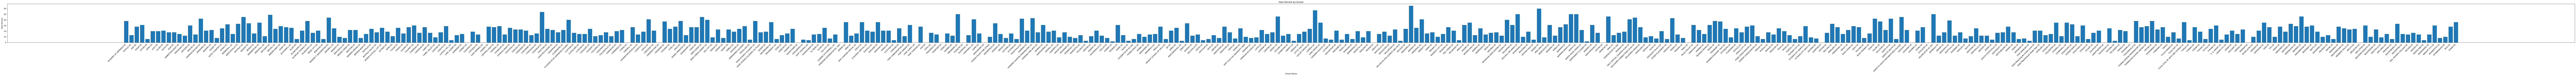

In [112]:
plt.figure(figsize=(200, 6))
plt.bar(df_OkSciHighSchools['SchoolName'], df_OkSciHighSchools['passpercent'])  # adjust y-axis column name
plt.xticks(rotation=45, ha='right')
plt.xlabel('School Name')
plt.ylabel('Pass Percent')
plt.title('Pass Percent by School')
plt.tight_layout()
plt.show()


In [113]:
# Sort by passpercent
df_sorted = df_OkSciHighSchools.sort_values(by='passpercent', ascending=False)

# Create a color column: red for Atoka HS, blue for others
df_sorted['Color'] = df_sorted['SchoolName'].apply(
    lambda name: 'red' if name == 'ATOKA HS' else 'blue'
)

# Force x-axis order based on sorted SchoolName
category_order = df_sorted['SchoolName'].tolist()

# Create the bar chart with explicit category order
fig = px.bar(
    df_sorted,
    x='SchoolName',
    y='passpercent',
    color='Color',
    color_discrete_map='identity',
    title='Pass Percent by School (Atoka HS Highlighted)',
    category_orders={'SchoolName': category_order}
)

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=-45)

fig.show()


Here you can clearly see the schools with higher scores than us in 2023 on the science exam. Not the tall bars out of order are stacked because the school is listed twice in the raw data.

Valuable insights and suggestions:
Our scores were in the upper range in 2023-24 above a zscore above 1.
To raise scores further we might see what the few schools above us are using for benchmarks or curricula for discussion at our site.

In [114]:

import plotly.graph_objects as go

# Define magnet full codes without hyphens
magnet_codes = {
    "55I089706",  # Classen HS
    "55I089508",  # Classen MS
    "72I001735",  # Booker T Washington HS
    "72I001725",  # Edison Prep
    "72I001710",  # Will Rogers CHS
    "72I001715",  # McLain HS Science/Tech
    "72I001520",  # Carver MS
    "72I001525",  # Thoreau Academy
    "72I001130",  # Eisenhower Int’l School
    "72I001135",  # Zarrow Int’l School
    "72I001140",  # Felicitas Mendez Int’l School
    "72I001145",  # Mayo Demonstration Academy
}

# Sort DataFrame
df_sorted = df_OkSciHighSchools.sort_values(by='passpercent', ascending=False)

# Determine custom bar colors
colors = []
for _, row in df_sorted.iterrows():
    full_code_clean = str(row['FullCode']).replace("-", "")
    if row['SchoolName'] == 'ATOKA HS':
        colors.append('red')
    elif full_code_clean in magnet_codes:
        colors.append('orange')
    elif not str(row['DistrictCode']).startswith('I'):
        colors.append('green')
    else:
        colors.append('blue')

# Create the bar chart using graph_objects to preserve x-order and color
fig = go.Figure(
    data=[
        go.Bar(
            x=df_sorted['SchoolName'],
            y=df_sorted['passpercent'],
            marker_color=colors  # Custom color list
        )
    ]
)

# Update layout
fig.update_layout(
    title='Pass Percent by School (Atoka Red, Magnets Orange, Non-"I" Districts Green)',
    xaxis_tickangle=-45,
    xaxis_title='School Name',
    yaxis_title='Pass Percent',
    showlegend=False
)

fig.show()




The graph above is the same as before, but charters are now green, and magnet schools are orange.
You can see that Atoka performed similar to magnet schools, slightly lower.